# Part_1: Stroke_Prediction - Preparation of data for analysis


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df= pd.read_csv('c:/1/Stroke_Prediction.csv')
df.head(5)

,ID,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Stroke
0,31153,Male,1104.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30650,Male,21204.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,17412,Female,2928.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,57008,Female,25578.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46657,Male,5128.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


### <span style="color:blue">1. Sprawdzenie kompletność i formatu danych</span>

In [2]:
df.isnull().sum()

ID                    0
Gender                0
Age_In_Days           0
Hypertension          0
Heart_Disease         0
Ever_Married          0
Type_Of_Work          0
Residence             0
Avg_Glucose           0
BMI                1462
Smoking_Status    13292
Stroke                0
dtype: int64

Brakuje danych dla: 
    - BMI
    - Smoking_Status
    
##### Struktura braków: BMI i Smoking_Status

obserwacji - zmiennych:  (43400, 12)


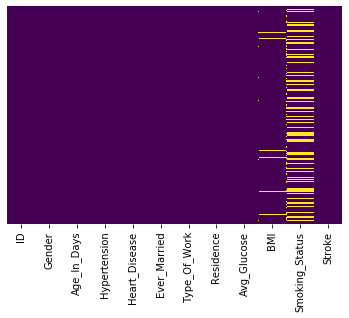

In [3]:
import seaborn as sns

print('obserwacji - zmiennych: ',df.shape)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### <span style="color:blue"> Analiza BMI (Body Mass Index)</span>

 - BMI<18,5                > nadwaga
 - 18,5<=BMI<=24,9         > Waga prawidłowa
 - 25<=BMI <=29,9          > Nadwaga
 - BMI>30                  > Otyłość

Source:  https://www.poradnikzdrowie.pl/sprawdz-sie/kalkulatory/kalkulator-wagi-bmi-aa-4Q8M-4h3E-dtKD.html


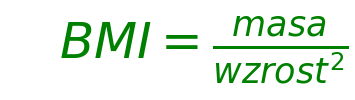

In [4]:
a = r'BMI = \frac{masa}{{wzrost}^{2}}'
ax = plt.axes([0,0,0.3,0.3]) #left,bottom,width,height
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
plt.text(0.4,0.4,'$%s$' %a,size=50,color="green")
print('Source: ','https://www.poradnikzdrowie.pl/sprawdz-sie/kalkulatory/kalkulator-wagi-bmi-aa-4Q8M-4h3E-dtKD.html')

#### Sprawdzam czy są błedne dane we wskaźniku BMI (Body Mass Index)

- Wartość minimalna dla BMI: Zakładam, że ludzie mają minimalnie 100 cm wzrostu i ważą maksymalnie 300 kg
- Wartość maksymalna dla BMI: Zakładam, że ludzie mają maksymalnie 230 cm wzrostu i ważą minimalnie 20 kg

In [5]:
max_BMI=400/(1*1)
min_BMI=30/(2.20*2.20)

print('max_BMI: ', max_BMI)
print('min_BMI: ', min_BMI)


max_BMI:  400.0
min_BMI:  6.198347107438016


In [6]:
df[(df['BMI']<=10)&(df['BMI']>=300)]

,ID,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Stroke


Brak danych zafałszowanyw w kolumnie BMI.

Sprawdzam jaka jest struktura danych.

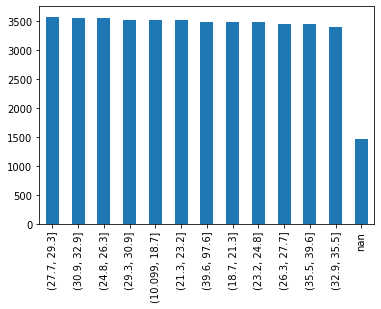

In [7]:
BMI1 = pd.qcut(df['BMI'],12)
BMI1.value_counts(dropna = False).sort_values(ascending=False).plot(kind='bar')

In [8]:
#df.BMI.value_counts(dropna = False)

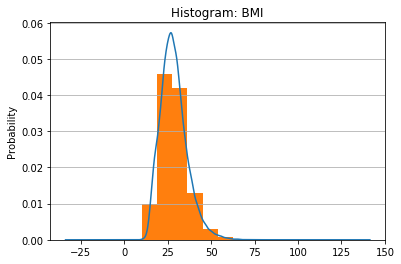

In [9]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
df['BMI'].plot.kde(ax=ax, legend=False, title='Histogram: BMI')
df['BMI'].plot.hist(density=True, ax=ax)

ax.set_ylabel('Probability')
ax.grid(axis='y')
#ax.set_facecolor('#d8dcd6')

<div class="alert-danger"> W mojej ocenie brak możliwości odtworzenia brakujących wartości BMI. Należy więc skasować rekordy z brakującymi wartościami BMI.</div>

### <span style="color:blue">Analiza Smoking_Status</span>




In [10]:
df['Smoking_Status'].value_counts(dropna = False)

never smoked       16053
NaN                13292
formerly smoked     7493
smokes              6562
Name: Smoking_Status, dtype: int64

Podobnie nie ma możliwości uzupełnienia brakujących wartości zmienej niezależnej: Smoking_Status na podstawie zachowania pozostałych zmiennych niezależnych.

Zmienna ta musi mieć trzy stany: 
- never smoked,
- formerly smoked, 
- smokes

Pozostawienie czwartego stanu NaN byłoby błędem.

In [11]:
df['Smoking_Status'].value_counts(normalize=True,dropna = False)

never smoked       0.369885
NaN                0.306267
formerly smoked    0.172650
smokes             0.151198
Name: Smoking_Status, dtype: float64

Jak ważna jest informacja 'Smoking_Status' i 'BMI' dla zmiennej wynikowej? Sprawdzam to ponieważ istnieje możliwość eliminacji całych zmiennych. Przy okazji zbadamy korelacjie pozostałych zmiennych egzogenicznych ze zmienną endogeniczną.

In [12]:
df['Ss_nowa'] = pd.Categorical(df['Smoking_Status']).codes

CORREL = df.corr().sort_values('Stroke')
print(CORREL['Stroke'])
del df['Ss_nowa']

ID               0.003067
Ss_nowa          0.019140
BMI              0.020285
Hypertension     0.075332
Avg_Glucose      0.078917
Heart_Disease    0.113763
Age_In_Days      0.153703
Stroke           1.000000
Name: Stroke, dtype: float64


<div class="alert-danger"> W mojej ocenie brak możliwości odtworzenia brakujących wartości 'Smoking_Status'. Należy więc skasować rekordy z brakującymi wartościami 'Smoking_Status' mimo, że jest ich aż 31%. Badacz musi odejmować odważne decyzj.</div>

### <span style="color:red"> Kasuje wszystkie rekordy z brakami: 'Smoking_Status' i 'BMI'</span>

In [13]:
print('Przed kasowaniem: ',df.shape)
df = df.dropna(how='any')
print('Po kasowaniu:     ',df.shape)

Przed kasowaniem:  (43400, 12)
Po kasowaniu:      (29072, 12)


In [14]:
df.head(5)

,ID,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Stroke
1,30650,Male,21204.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
3,57008,Female,25578.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
6,53725,Female,18995.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41553,Female,27413.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,16167,Female,11689.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


### <span style="color:blue">Analiza Gender</span>

In [15]:
df['Gender'].value_counts(normalize=True,dropna = False)

Female    0.614062
Male      0.385698
Other     0.000241
Name: Gender, dtype: float64

Co to znaczyy płeć 'Other'? Przedmiotem badania jest podatność na udar m.in pod kontem konkretnej płci. Pleć muzgu nie ma tu znaczenia. Przyjmuję, że 'Other' to błąd danych i go kasuje. Pozostawienie trzeciego stanu 'Other' byłoby błędem dla procesu klasyfiukacji.

In [16]:
df['Gender'].replace('Other', np.nan, inplace=True)
print('Przed kasowaniem: ',df.shape)
df = df.dropna(how='any')
print('Po kasowaniu:     ',df.shape)

Przed kasowaniem:  (29072, 12)
Po kasowaniu:      (29065, 12)


### <span style="color:blue">Analiza Age_In_Days</span>
Wiek człowieka analizujemy w latach. Jednocześnie ludzie starzeją się nierównomiernie dlatego wskazane jest analizowac pacjętów wegług grup wiekowych.

In [17]:
df['Age_years']= df['Age_In_Days']/365

Sprawdzam czy zmienna 'Age_years' ma prawidłowe wartości. Okazuje się, że trzech pacjętów ma wiek powyżej 200 lat. Kasujemy te rekordy.

In [18]:
df[df['Age_years']>120]

,ID,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Stroke,Age_years
1342,58414,Female,85451.0,0,0,No,Private,Rural,65.30,22.1,smokes,0,234.112329
18177,31212,Female,117179.0,0,0,Yes,Govt_job,Rural,84.39,38.9,never smoked,0,321.038356
26716,70730,Female,79231.0,0,0,No,Private,Rural,77.62,23.1,formerly smoked,0,217.071233


In [19]:
df['Age_years'] = df['Age_years'].apply(lambda x: np.nan if x > 120 else x)
print('Przed kasowaniem: ',df.shape)
df = df.dropna(how='any')
print('Po kasowaniu:     ',df.shape)
df[df['Age_years']>120]

Przed kasowaniem:  (29065, 13)
Po kasowaniu:      (29062, 13)


,ID,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Stroke,Age_years


Podzieliłęm wiek na 10 grup wiekowych. Kasuję kolumnę 'Age_In_Days'

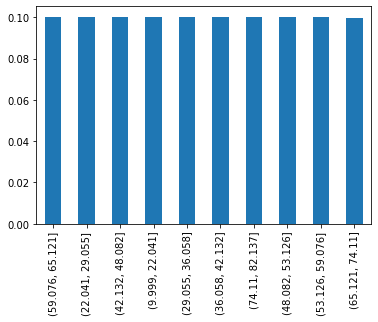

In [20]:
del df['Age_In_Days']
df['Age_years_10']= pd.qcut(df['Age_years'],10)
df['Age_years_10'].value_counts(normalize=True,dropna = False).sort_values(ascending=False).plot(kind='bar')

### <span style="color:blue">Analiza Hypertension</span>

In [21]:
df['Hypertension'].value_counts(normalize=True,dropna = False)

0    0.88848
1    0.11152
Name: Hypertension, dtype: float64

Nadciśnienie występuje u 11% badanych. Nadcisnienie występuje u ludzi mających wysokie BMI (nadwagę) sprawdźmy, czy tak jest.


In [22]:
df['BMI_5']= pd.qcut(df['BMI'],5)
df.pivot_table(index='BMI_5', columns = 'Hypertension', values='Age_years',aggfunc='count')

Hypertension,0,1
BMI_5,,
"(10.099, 24.1]",5605,290
"(24.1, 27.4]",5352,506
"(27.4, 30.7]",5160,691
"(30.7, 35.3]",4893,810
"(35.3, 92.0]",4811,944


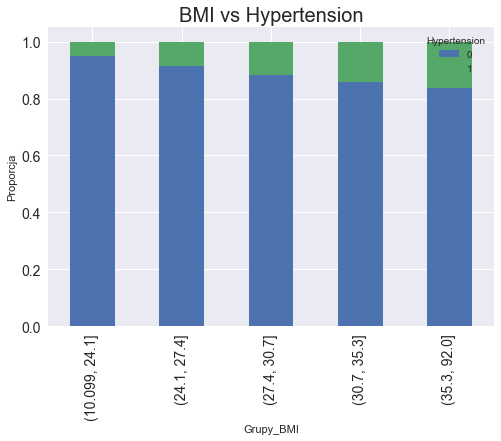

In [23]:
df['BMI_5'] = df['BMI_5'].astype(object)

plt.style.use('seaborn')

table=pd.crosstab(df['BMI_5'],df['Hypertension'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, fontsize=14)
plt.title('BMI vs Hypertension', fontsize=20)
plt.xlabel('Grupy_BMI')
plt.ylabel('Proporcja')

del df['BMI_5']

Zmienna egzogeniczna 'Hypertension' jest prawidłowa i zachowuje się zgodnie z ogólnym poglądem że im większe BMI tym większe nadciśnienie tętnicze.

### <span style="color:blue">Analiza Heart_Disease</span>

In [24]:
df['Heart_Disease'].value_counts(normalize=True,dropna = False)

0    0.947836
1    0.052164
Name: Heart_Disease, dtype: float64

### <span style="color:blue">Analiza Ever_Married</span>

In [25]:
df['Ever_Married'].value_counts(normalize=True,dropna = False)

Yes    0.746198
No     0.253802
Name: Ever_Married, dtype: float64

### <span style="color:blue">Analiza Type_Of_Work</span>

In [26]:
df['Type_Of_Work'].value_counts(normalize=True,dropna = False)

Private          0.651985
Self-employed    0.179065
Govt_job         0.144312
children         0.021162
Never_worked     0.003475
Name: Type_Of_Work, dtype: float64

### <span style="color:blue">Analiza Residence</span>

In [27]:
df['Residence'].value_counts(normalize=True,dropna = False)

Urban    0.502099
Rural    0.497901
Name: Residence, dtype: float64

### <span style="color:blue">Analiza Avg_Glucose</span>

In [28]:
df['Avg_Glucose'].describe()

count    29062.000000
mean       106.408801
std         45.273649
min         55.010000
25%         77.630000
50%         92.130000
75%        113.917500
max        291.050000
Name: Avg_Glucose, dtype: float64

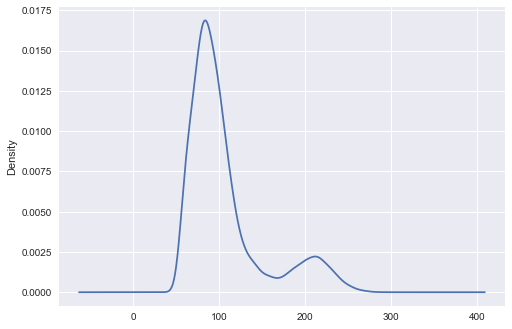

In [29]:
df['Avg_Glucose'].plot.kde()

Rozkład gęstości prawdopodobieństwa zmiennej: 'Avg_Glucose' posiada anomalie, której nie będziemy wyjaśniali na tym etape badania.

### <span style="color:blue">Analiza Stroke</span>

In [30]:
df['Stroke'].value_counts(normalize=True,dropna = False)

0    0.981144
1    0.018856
Name: Stroke, dtype: float64

Zmienna wynikowa 'Stroke' jest bardzo nizbilansowana. Z ciekawości zerkniemy czy pojawia się jakiś wzór zależności zmiennej zależnej i zmiennych niezależnych.

### <span style="color:blue">Analiza ogólna zmiennych</span>
Wykonuje się ją w ceu sprawdzenia czy zachowanie zmiennych jest zgodne z ogólnie znaną wiedzą.

In [31]:
df.columns

Index(['ID', 'Gender', 'Hypertension', 'Heart_Disease', 'Ever_Married',
       'Type_Of_Work', 'Residence', 'Avg_Glucose', 'BMI', 'Smoking_Status',
       'Stroke', 'Age_years', 'Age_years_10'],
      dtype='object')

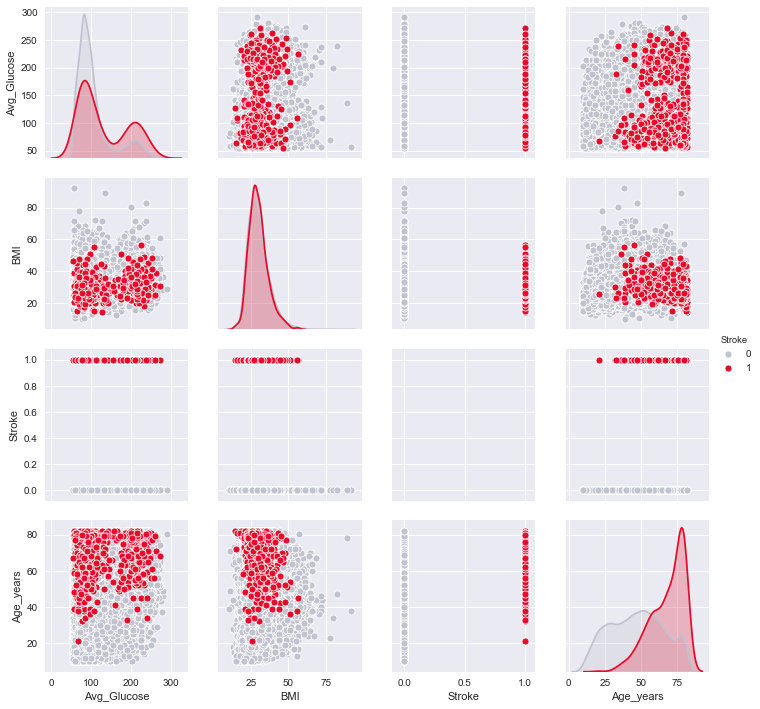

In [35]:
kot = ["#c0c2ce", "#e40c2b"]
sns.pairplot(data=df[[ 'Avg_Glucose', 'BMI', 'Stroke', 'Age_years']], hue='Stroke', dropna=True, palette=kot)

Wstępna analiza danych ciągłych wykazała, że:
1. Prawdopodobieństwo udaru rośnie wraz z wiekiem
2. Udar najczęściej występuje w przedziale BMI 20-50
3. Poziom glukozy wydaje się nie mieć znaczenia

Zachowanie zmiennych jest zgodne z ogólnie znaną wiedzą.

### Zapisanie oczyszczonego i poprawionego zbioru danych do dalszych analiz

In [36]:
df.head(3)

,ID,Gender,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Stroke,Age_years,Age_years_10
1,30650,Male,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,58.093151,"(53.126, 59.076]"
3,57008,Female,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,70.076712,"(65.121, 74.11]"
6,53725,Female,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0,52.041096,"(48.082, 53.126]"


In [37]:
df.isnull().sum()

ID                0
Gender            0
Hypertension      0
Heart_Disease     0
Ever_Married      0
Type_Of_Work      0
Residence         0
Avg_Glucose       0
BMI               0
Smoking_Status    0
Stroke            0
Age_years         0
Age_years_10      0
dtype: int64

In [39]:
df.to_csv('c:/1/Stroke_Prediction_CLEAR.csv')

End of Part_1: Stroke_Prediction - Preparation of data for analysis